## Base-DT
A baseline Decision Tree using entropy as decision criterion and using default values for the rest of the parameters.

In [1]:
%load_ext autoreload
%autoreload 2

from utils import config
from utils import ProcessDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Loading Latin and Greek train and val data.

The data consists of 1025 columns, 1024 columns for each pixel and 1 row specifying the character it represents.

In [2]:
Latin_Train = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TRAIN_SET))
Latin_X_Train = Latin_Train[:,0:1024]
Latin_Y_Train = Latin_Train[:,1024]
Latin_Val = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_DATA_VAL))
Latin_X_Val = Latin_Val[:,0:1024]
Latin_Y_Val = Latin_Val[:,1024]

Greek_Train = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TRAIN_SET))
Greek_X_Train = Greek_Train[:,0:1024]
Greek_Y_Train = Greek_Train[:,1024]
Greek_Val = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_DATA_VAL))
Greek_X_Val = Greek_Val[:,0:1024]
Greek_Y_Val = Greek_Val[:,1024]

### Training the base DT model

In [3]:
clf_latin = DecisionTreeClassifier(criterion="entropy")
clf_latin.fit(Latin_X_Train, Latin_Y_Train)

clf_greek = DecisionTreeClassifier(criterion="entropy")
clf_greek.fit(Greek_X_Train, Greek_Y_Train)

DecisionTreeClassifier(criterion='entropy')

## Validating the model with K-Fold Cross-validation

In [4]:
kfold = KFold(n_splits=10, random_state=100)

results_kfold = cross_val_score(clf_latin, Latin_X_Val, Latin_Y_Val, cv=kfold)
print("Accuracy of latin perceptron: %.2f%%" % (results_kfold.mean()*100.0)) 

results_kfold = cross_val_score(clf_greek, Greek_X_Val, Greek_Y_Val, cv=kfold)
print("Accuracy of greek perceptron: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy of latin perceptron: 23.51%
Accuracy of greek perceptron: 68.83%


## Predicting new values
We load the dataset and then use the model to predict what character they are.

In [5]:
Latin_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_NOLABEL))
Latin_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_LABEL))[:,1024]

Greek_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_NOLABEL))
Greek_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_LABEL))[:,1024]

In [6]:
Latin_Y_Pred = clf_latin.predict(Latin_X_Test)
pd.DataFrame(Latin_Y_Pred).to_csv("./Output/BASE-DP-DS1.csv", header=None)

Greek_Y_Pred = clf_greek.predict(Greek_X_Test)
pd.DataFrame(Greek_Y_Pred).to_csv("./Output/BASE-DP-DS2.csv", header=None)

## Finding out how acurate the model is
### 1. Confusion Matrix

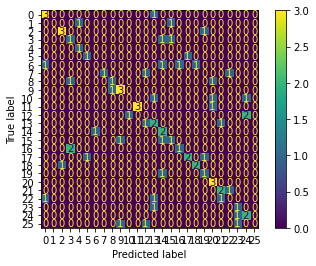

In [7]:
plot_confusion_matrix(clf_latin, Latin_X_Test, Latin_Y_Test)
plt.show()

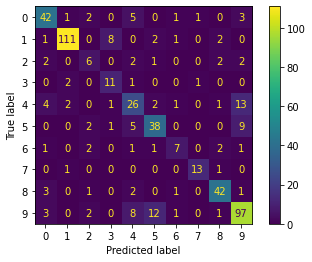

In [8]:
plot_confusion_matrix(clf_greek, Greek_X_Test, Greek_Y_Test)
plt.show()

### 2. Precision, recall, and f1-measure for each class

In [9]:
ProcessDataset.calculate_PRF(Latin_Y_Test, Latin_Y_Pred)

,precision,recall,f1
0,0.600000,0.750000,0.666667
1,0.000000,0.000000,0.000000
2,0.750000,0.750000,0.750000
3,0.250000,0.333333,0.285714
4,0.500000,1.000000,0.666667
5,0.500000,0.500000,0.500000
6,0.000000,0.000000,0.000000
7,1.000000,0.333333,0.500000
8,0.500000,0.333333,0.400000
9,0.600000,0.750000,0.666667


In [10]:
ProcessDataset.calculate_PRF(Greek_Y_Test, Greek_Y_Pred)

,precision,recall,f1
0,0.750000,0.763636,0.756757
1,0.948718,0.888000,0.917355
2,0.400000,0.400000,0.400000
3,0.523810,0.733333,0.611111
4,0.520000,0.520000,0.520000
5,0.678571,0.690909,0.684685
6,0.583333,0.466667,0.518519
7,0.866667,0.866667,0.866667
8,0.823529,0.840000,0.831683
9,0.769841,0.782258,0.776000


### 3. Accuracy, macro-average f1 and weighted-average f1 of the model

#### Base-DT model on DS1 - Latin data set

In [11]:
print("Accuracy of base decision tree model on DS1: " + str(accuracy_score(Latin_Y_Test, Latin_Y_Pred) * 100) + "%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of base decision tree model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of base decision tree model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='weighted')*100)+"%")


Accuracy of base decision tree model on DS1: 45.56962025316456%
Macro-average f1 of base decision tree model on DS1: 40.94932844932844%
Weighted-average f1 of base decision tree model on DS1: 42.049427365883055%


#### Base-DT model on DS2 - Greek data set

In [12]:
print("Accuracy of base decision tree model on DS2: " + str(accuracy_score(Greek_Y_Test, Greek_Y_Pred)*100)+"%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of perceptron model on DS2: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of perceptron model on DS2: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='weighted')*100)+"%")

Accuracy of base decision tree model on DS2: 75.72254335260115%
Macro-average f1 of perceptron model on DS2: 68.82776277955396%
Weighted-average f1 of perceptron model on DS2: 75.85766929232535%
